In [ ]:
!pip -q install langchain openai tiktoken yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.3/803.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 942.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requi

In [ ]:
import os

os.environ["OPENAI_API_KEY"] =

In [ ]:
!pip show langchain

Name: langchain
Version: 0.0.354
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


## Understanding OpenAI Functions

### Simple example

In [ ]:
functions = [
    {
        "name": "get_current_weather",
        "description": "Get the current weather",
        "parameters": {
            "type": "object",
            "properties": {
                "location": {
                    "type": "string",
                    "description": "The city and state, e.g. San Francisco, CA",
                },
                "format": {
                    "type": "string",
                    "enum": ["celsius", "fahrenheit"],
                    "description": "The temperature unit to use. Infer this from the users location.",
                },
            },
            "required": ["location", "format"],
        },
    }
]

[link text](https://)### Setting up YFinance


In [ ]:
import yfinance as yf

def get_stock_price(symbol):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    return round(todays_data['Close'][0], 2)

# use the function
print(get_stock_price('AAPL'))



184.25


In [ ]:
# use the function
print(get_stock_price('GOOG'))

140.36


### Setting up tools

In [ ]:
from langchain.tools import BaseTool
from typing import Optional, Type
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain.chat_models import ChatOpenAI

In [ ]:
# # from langchain.tools import DuckDuckGoSearchTool
# from langchain.agents import Tool
# from langchain.tools import BaseTool

# # search = DuckDuckGoSearchTool()
# # # defining a single tool
# # tools = [
# #     Tool(
# #         name = "search",
# #         func=search.run,
# #         description="useful for when you need to answer questions about current events. You should ask targeted questions"
# #     )
# # ]

In [ ]:
from pydantic import BaseModel, Field

class StockPriceCheckInput(BaseModel):
    """Input for Stock price check."""

    stockticker: str = Field(..., description="Ticker symbol for stock or index")


In [ ]:
class StockPriceTool(BaseTool):
    name = "get_stock_ticker_price"
    description = "Useful for when you need to find out the price of stock. You should input the stock ticker used on the yfinance API"

    def _run(self, stockticker: str):
        # print("i'm running")
        price_response = get_stock_price(stockticker)

        return price_response

    def _arun(self, stockticker: str):
        raise NotImplementedError("This tool does not support async")

    args_schema: Optional[Type[BaseModel]] = StockPriceCheckInput


In [ ]:
# StockPriceTool = Tool(
#     name='Get Stock Ticker price',
#     func= get_stock_price,
#     description="Useful for when you need to find out the price of stock. You should input the stock ticker used on the yfinance API"
# )

## LangChain doing it Manualy

*   List item
*   List item



In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, AIMessage, ChatMessage, FunctionMessage

In [ ]:
model = ChatOpenAI(model="gpt-3.5-turbo-0613")

In [ ]:
from langchain.tools import MoveFileTool, format_tool_to_openai_function

In [ ]:
{'name': 'move_file',
 'description': 'Move or rename a file from one location to another',
 'parameters': {'title': 'FileMoveInput',
                'description': 'Input for MoveFileTool.',
                'type': 'object',
                'properties': {'source_path': {'title': 'Source Path',
                                               'description': 'Path of the file to move',
                                               'type': 'string'},
                               'destination_path': {'title': 'Destination Path',
                                               'description': 'New path for the moved file',
                                               'type': 'string'}},
                'required': ['source_path', 'destination_path']}}

{'name': 'move_file',
 'description': 'Move or rename a file from one location to another',
 'parameters': {'title': 'FileMoveInput',
  'description': 'Input for MoveFileTool.',
  'type': 'object',
  'properties': {'source_path': {'title': 'Source Path',
    'description': 'Path of the file to move',
    'type': 'string'},
   'destination_path': {'title': 'Destination Path',
    'description': 'New path for the moved file',
    'type': 'string'}},
  'required': ['source_path', 'destination_path']}}

In [ ]:
# |MoveFileTool().args_schema.schema()

In [ ]:
tools = [StockPriceTool()]
functions = [format_tool_to_openai_function(t) for t in tools]

In [ ]:
functions[0]

{'name': 'get_stock_ticker_price',
 'description': 'Useful for when you need to find out the price of stock. You should input the stock ticker used on the yfinance API',
 'parameters': {'title': 'StockPriceCheckInput',
  'description': 'Input for Stock price check.',
  'type': 'object',
  'properties': {'stockticker': {'title': 'Stockticker',
    'description': 'Ticker symbol for stock or index',
    'type': 'string'}},
  'required': ['stockticker']}}

In [ ]:
ai_message = model.predict_messages([HumanMessage(content='What is the price of Google stock')], functions=functions)

In [ ]:
ai_message

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "stockticker": "GOOGL"\n}', 'name': 'get_stock_ticker_price'}})

In [ ]:
ai_message.additional_kwargs['function_call']

{'arguments': '{\n  "stockticker": "GOOGL"\n}',
 'name': 'get_stock_ticker_price'}

In [ ]:
import json
_args = json.loads(ai_message.additional_kwargs['function_call'].get('arguments'))
_args

{'stockticker': 'GOOGL'}

In [ ]:
tool_result = tools[0](_args)
tool_result

138.92

In [ ]:
FunctionMessage(name='get_stock_ticker_price',content=tool_result)

FunctionMessage(content='138.92', name='get_stock_ticker_price')

In [ ]:
final_message = model.predict_messages([HumanMessage(content='What is the price of Google stock'),
                                  ai_message,
                                  FunctionMessage(name='get_stock_ticker_price',content=tool_result),
                                  ], functions=functions)

In [ ]:
final_message

AIMessage(content='The price of Google stock (GOOGL) is $138.92.')



```
# This is formatted as code
```

## Putting it together as an Agent

In [ ]:
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [ ]:
open_ai_agent = initialize_agent(tools,
                        llm,
                        agent=AgentType.OPENAI_FUNCTIONS,
                        verbose=True)

In [ ]:
open_ai_agent.run("What is the price of Lockheed")



> Entering new AgentExecutor chain...

Invoking: `get_stock_ticker_price` with `{'stockticker': 'LMT'}`


459.12The current price of Lockheed Martin Corporation (LMT) is $459.12.

> Finished chain.


'The current price of Lockheed Martin Corporation (LMT) is $459.12.'

## OpenAI Functions Agent

### Advantages
- Better reasoning and tool selection than ReACT / Toolformer?
- Less tokens needed

### Disadvantages
- Not as easy to customize via prompt change etc if it doesn't work
- locks you code into the OpenAI way
- Still need tokens for Tool/Function descriptions

## Multiple Tools

In [ ]:
from datetime import datetime, timedelta

def get_price_change_percent(symbol, days_ago):
    ticker = yf.Ticker(symbol)

    # Get today's date
    end_date = datetime.now()

    # Get the date N days ago
    start_date = end_date - timedelta(days=days_ago)

    # Convert dates to string format that yfinance can accept
    start_date = start_date.strftime('%Y-%m-%d')
    end_date = end_date.strftime('%Y-%m-%d')

    # Get the historical data
    historical_data = ticker.history(start=start_date, end=end_date)

    # Get the closing price N days ago and today's closing price
    old_price = historical_data['Close'].iloc[0]
    new_price = historical_data['Close'].iloc[-1]

    # Calculate the percentage change
    percent_change = ((new_price - old_price) / old_price) * 100

    return round(percent_change, 2)

# Use the function
print(get_price_change_percent('AAPL', 90))  # for 30 days ago


3.95


In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

def calculate_performance(symbol, days_ago):
    ticker = yf.Ticker(symbol)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days_ago)
    start_date = start_date.strftime('%Y-%m-%d')
    end_date = end_date.strftime('%Y-%m-%d')
    historical_data = ticker.history(start=start_date, end=end_date)
    old_price = historical_data['Close'].iloc[0]
    new_price = historical_data['Close'].iloc[-1]
    percent_change = ((new_price - old_price) / old_price) * 100
    return round(percent_change, 2)

def get_best_performing(stocks, days_ago):
    best_stock = None
    best_performance = None
    for stock in stocks:
        try:
            performance = calculate_performance(stock, days_ago)
            if best_performance is None or performance > best_performance:
                best_stock = stock
                best_performance = performance
        except Exception as e:
            print(f"Could not calculate performance for {stock}: {e}")
    return best_stock, best_performance

stocks = ['AAPL', 'MSFT', 'GOOG']
days_ago = 90  # change as desired

best_stock, best_performance = get_best_performing(stocks, days_ago)
print(f"The best performing stock over the past {days_ago} days is {best_stock} with a performance of {best_performance}%")


The best performing stock over the past 90 days is MSFT with a performance of 13.47%


In [ ]:
import numpy as np
import pandas as pd

def monte_carlo_simulation(stock_ticker, days_in_future, num_simulations=5):
    data = yf.download(stock_ticker, period='1y')
    daily_returns = data['Close'].pct_change().dropna()
    mean_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    last_price = data['Close'].iloc[-1]
    simulation_df = pd.DataFrame()

    for x in range(num_simulations):
        count = 0
        daily_volatility = std_daily_return
        price_series = []
        price = last_price * (1 + np.random.normal(mean_daily_return, daily_volatility))
        price_series.append(price)

        for y in range(days_in_future):
            if count == 251:
                break
            price = price_series[count] * (1 + np.random.normal(mean_daily_return, daily_volatility))
            price_series.append(price)
            count += 1

        simulation_df[x] = price_series

    return simulation_df

# ***Monte caro option***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

def monte_carlo_option_pricing(stock_ticker, strike_price, days_to_expiry, num_simulations=5, risk_free_rate=0.01):
    # Download historical data
    data = yf.download(stock_ticker, period='1y')
    daily_returns = data['Close'].pct_change().dropna()
    mean_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    last_price = data['Close'].iloc[-1]

    # Convert days to years for expiry
    time_to_expiry = days_to_expiry / 252

    # Store the results of each simulation
    simulated_option_prices = []

    # Monte Carlo simulation
    for _ in range(num_simulations):
        # Simulating the stock price path
        price_path = [last_price]
        for _ in range(days_to_expiry):
            drift = (risk_free_rate - 0.5 * std_daily_return**2)
            shock = std_daily_return * np.random.normal()
            price = price_path[-1] * np.exp(drift + shock)
            price_path.append(price)

        # Calculate the payoff for European Call Option
        payoff = max(price_path[-1] - strike_price, 0)

        # Discount the payoff to present value and store
        discounted_payoff = np.exp(-risk_free_rate * time_to_expiry) * payoff
        simulated_option_prices.append(discounted_payoff)

    # Calculate average price of the option across all simulations
    estimated_option_price = np.mean(simulated_option_prices)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_option_prices, bins=30, alpha=0.75, color='blue')
    plt.title(f'Distribution of Simulated Option Prices for {stock_ticker}')
    plt.xlabel('Option Price')
    plt.ylabel('Frequency')
    plt.axvline(estimated_option_price, color='red', linestyle='dashed', linewidth=2)
    plt.show()

    return estimated_option_price




### Make the Tools

In [ ]:
from typing import List


# Define the input model for option pricing
class OptionPricingInput(BaseModel):
    stock_ticker: str = Field(..., description="Ticker symbol for the stock")
    strike_price: float = Field(..., description="Strike price of the option")
    days_in_future: int = Field(..., description="Number of days until option expiration")
    num_simulations: int = Field(..., description="Number of simulation paths")
    risk_free_rate: float = Field(..., description="Risk-free interest rate")

# Option pricing tool using Monte Carlo simulation
class MonteCarloOptionPricingTool(BaseTool):
    name = "monte_carlo_option_pricing"
    description = "Simulates option pricing for a given stock, strike price, and expiration period using the Monte Carlo method"

    def _run(self, stock_ticker: str, strike_price: float, days_in_future: int, num_simulations: int, risk_free_rate: float):
        return monte_carlo_option_pricing(stock_ticker, strike_price, days_in_future, num_simulations, risk_free_rate)

    def _arun(self, stock_ticker: str, strike_price: float, days_in_future: int, num_simulations: int, risk_free_rate: float):
        raise NotImplementedError("This tool does not support async")

    args_schema: Optional[Type[BaseModel]] = OptionPricingInput

class StockChangePercentageCheckInput(BaseModel):
    """Input for Stock ticker check. for percentage check"""

    stockticker: str = Field(..., description="Ticker symbol for stock or index")
    days_ago: int = Field(..., description="Int number of days to look back")

class StockPercentageChangeTool(BaseTool):
    name = "get_price_change_percent"
    description = "Useful for when you need to find out the percentage change in a stock's value. You should input the stock ticker used on the yfinance API and also input the number of days to check the change over"

    def _run(self, stockticker: str, days_ago: int):
        price_change_response = get_price_change_percent(stockticker, days_ago)

        return price_change_response

    def _arun(self, stockticker: str, days_ago: int):
        raise NotImplementedError("This tool does not support async")

    args_schema: Optional[Type[BaseModel]] = StockChangePercentageCheckInput


# the best performing

class StockBestPerformingInput(BaseModel):
    """Input for Stock ticker check. for percentage check"""

    stocktickers: List[str] = Field(..., description="Ticker symbols for stocks or indices")
    days_ago: int = Field(..., description="Int number of days to look back")

class StockGetBestPerformingTool(BaseTool):
    name = "get_best_performing"
    description = "Useful for when you need to the performance of multiple stocks over a period. You should input a list of stock tickers used on the yfinance API and also input the number of days to check the change over"

    def _run(self, stocktickers: List[str], days_ago: int):
        price_change_response = get_best_performing(stocktickers, days_ago)

        return price_change_response

    def _arun(self, stockticker: List[str], days_ago: int):
        raise NotImplementedError("This tool does not support async")

    args_schema: Optional[Type[BaseModel]] = StockBestPerformingInput

### Monte Carlo simulation

class MonteCarloInput(BaseModel):
    stock_ticker: str = Field(..., description="Ticker symbol for the stock")
    days_in_future: int = Field(..., description="Number of days to simulate into the future")
    num_simulations: int = Field(..., description="Number of simulation paths")

class MonteCarloTool(BaseTool):
    name = "monte_carlo_simulation"
    description = "Simulates stock price for a given number of days into the future using the Monte Carlo method"

    def _run(self, stock_ticker: str, days_in_future: int, num_simulations: int):
        return monte_carlo_simulation(stock_ticker, days_in_future, num_simulations)

    def _arun(self, stock_ticker: str, days_in_future: int, num_simulations: int):
        raise NotImplementedError("This tool does not support async")

    args_schema: Optional[Type[BaseModel]] = MonteCarloInput


In [ ]:
tools = [StockPriceTool(),StockPercentageChangeTool(), StockGetBestPerformingTool(), MonteCarloTool(), MonteCarloOptionPricingTool()]

# functions = [format_tool_to_openai_function(t) for t in tools]

In [ ]:
tools

[StockPriceTool(),
 StockPercentageChangeTool(),
 StockGetBestPerformingTool(),
 MonteCarloTool(),
 MonteCarloOptionPricingTool()]

In [ ]:
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [ ]:
open_ai_agent = initialize_agent(tools,
                        llm,
                        agent=AgentType.OPENAI_FUNCTIONS,
                        verbose=True)

In [ ]:
open_ai_agent.run("What is the price of Google stock today?")



> Entering new AgentExecutor chain...

Invoking: `get_stock_ticker_price` with `{'stockticker': 'GOOGL'}`


138.92The price of Google stock today is $138.92.

> Finished chain.


'The price of Google stock today is $138.92.'

In [ ]:
open_ai_agent.run("Has google's stock gone up over the past 90 days?")



> Entering new AgentExecutor chain...

Invoking: `get_price_change_percent` with `{'stockticker': 'GOOGL', 'days_ago': 90}`


3.29Yes, Google's stock (GOOGL) has gone up by 3.29% over the past 90 days.

> Finished chain.


"Yes, Google's stock (GOOGL) has gone up by 3.29% over the past 90 days."

In [ ]:
open_ai_agent.run("How much has google's stock gone up over the past 3 months?")



> Entering new AgentExecutor chain...

Invoking: `get_price_change_percent` with `{'stockticker': 'GOOGL', 'days_ago': 90}`


0.97Google's stock has gone up by approximately 0.97% over the past 3 months.

> Finished chain.


"Google's stock has gone up by approximately 0.97% over the past 3 months."

In [ ]:
open_ai_agent.run("Which stock out of Google, Meta and MSFT has performed best over the past 3 months?")



> Entering new AgentExecutor chain...

Invoking: `get_best_performing` with `{'stocktickers': ['GOOGL', 'META', 'MSFT'], 'days_ago': 90}`


('MSFT', 13.47)Microsoft (MSFT) has performed the best over the past 3 months with a return of 13.47%.

> Finished chain.


'Microsoft (MSFT) has performed the best over the past 3 months with a return of 13.47%.'

In [ ]:
open_ai_agent.run("How much has MSFT's stock gone up over the past 3 months?")



> Entering new AgentExecutor chain...

Invoking: `get_price_change_percent` with `{'stockticker': 'MSFT', 'days_ago': 90}`


18.13Microsoft's stock (MSFT) has gone up by 18.13% over the past 3 months.

> Finished chain.


"Microsoft's stock (MSFT) has gone up by 18.13% over the past 3 months."

In [ ]:
open_ai_agent.run("How much has Bitcoin gone up over the past 3 months?")



> Entering new AgentExecutor chain...

Invoking: `get_price_change_percent` with `{'stockticker': 'BTC-USD', 'days_ago': 90}`


52.04Bitcoin has gone up by 52.04% over the past 3 months.

> Finished chain.


'Bitcoin has gone up by 52.04% over the past 3 months.'



> Entering new AgentExecutor chain...

Invoking: `monte_carlo_option_pricing` with `{'stock_ticker': 'AAPL', 'strike_price': 170, 'days_in_future': 30, 'num_simulations': 1000, 'risk_free_rate': 0.01}`


[*********************100%%**********************]  1 of 1 completed


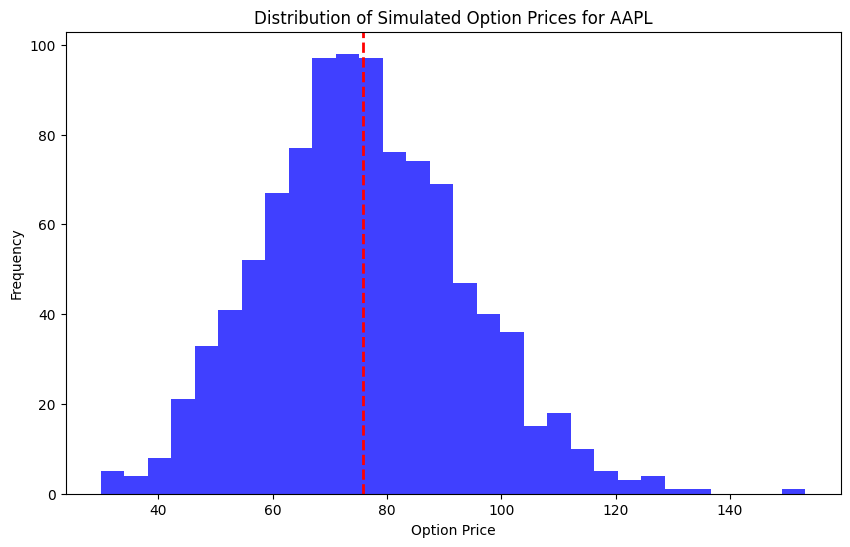

75.86681151514239The estimated price of a 30-day call option for AAPL stock with a strike price of $170, assuming a risk-free rate of 1% and using 1000 Monte Carlo simulations, is approximately $75.87.

> Finished chain.
The estimated price of a 30-day call option for AAPL stock with a strike price of $170, assuming a risk-free rate of 1% and using 1000 Monte Carlo simulations, is approximately $75.87.


In [ ]:
response = open_ai_agent.run("Estimate the price of a 30-day call option for AAPL stock with a strike price of $170, assuming a risk-free rate of 1%, using 1000 Monte Carlo simulations.")
print(response)